In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [140]:
import keras
import tensorflow as tf

In [142]:
seed_value = 0

np.random.seed(seed_value)
tf.set_random_seed(seed_value)

# 1 data&feat

In [143]:
from keras.datasets import imdb

In [144]:
imdb.load_data?

In [145]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=1000)

/Users/zhangjiaqi/workingspace/anaconda3/envs/ml3/lib/python3.7/site-packages/keras/datasets/imdb.py:101: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/Users/zhangjiaqi/workingspace/anaconda3/envs/ml3/lib/python3.7/site-packages/keras/datasets/imdb.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [146]:
x_train[0][:10]

[1, 14, 22, 16, 43, 530, 973, 2, 2, 65]

In [147]:
np.zeros?

In [148]:
##bow of sentence
def sent2vec(sentences,dim=1000):
    vec = np.zeros(shape=(sentences.shape[0],dim))
    for i,sent in enumerate(sentences):
        vec[i,sent] = 1
    return vec

In [149]:
x_train_vec = sent2vec(x_train)
x_test_vec = sent2vec(x_test)

In [150]:
x_train_vec[0][:10]

array([0., 1., 1., 0., 1., 1., 1., 1., 1., 1.])

In [151]:
y_train.dtype

dtype('int64')

# 2 model

In [152]:
nn = keras.models.Sequential()
nn.add(keras.layers.Dense(units=16,activation='relu',input_shape=(1000,)))
nn.add(keras.layers.Dense(units=16,activation='relu'))
nn.add(keras.layers.Dense(units=16,activation='tanh'))
nn.add(keras.layers.Dense(units=1,activation='sigmoid'))

In [153]:
nn.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [154]:
nn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 16)                16016     
_________________________________________________________________
dense_36 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_37 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_38 (Dense)             (None, 1)                 17        
Total params: 16,577
Trainable params: 16,577
Non-trainable params: 0
_________________________________________________________________


In [155]:
x_train.shape

(25000,)

In [156]:
y_train.shape

(25000,)

In [157]:
##split train and eval

In [158]:
x_train_vec_train = x_train_vec[:10000]
y_train_train = y_train[:10000]

In [159]:
x_train_vec_eval = x_train_vec[10000:]
y_train_eval = y_train[10000:]

In [134]:
history= nn.fit(x_train_vec_train,y_train_train,batch_size=256,epochs=10,validation_data=[x_train_vec_eval,y_train_eval])

Train on 10000 samples, validate on 15000 samples
Epoch 1/10
10000/10000 [==============================] - 14s 1ms/step - loss: 0.6350 - acc: 0.6710 - val_loss: 0.5214 - val_acc: 0.7898
Epoch 2/10
10000/10000 [==============================] - 1s 104us/step - loss: 0.4278 - acc: 0.8205 - val_loss: 0.3737 - val_acc: 0.8423
Epoch 3/10
10000/10000 [==============================] - 1s 105us/step - loss: 0.3236 - acc: 0.8667 - val_loss: 0.3530 - val_acc: 0.8479
Epoch 4/10
10000/10000 [==============================] - 1s 103us/step - loss: 0.2896 - acc: 0.8825 - val_loss: 0.3523 - val_acc: 0.8489
Epoch 5/10
10000/10000 [==============================] - 1s 95us/step - loss: 0.2683 - acc: 0.8961 - val_loss: 0.3560 - val_acc: 0.8501
Epoch 6/10
10000/10000 [==============================] - 1s 96us/step - loss: 0.2530 - acc: 0.9033 - val_loss: 0.3775 - val_acc: 0.8435
Epoch 7/10
10000/10000 [==============================] - 1s 93us/step - loss: 0.2409 - acc: 0.9088 - val_loss: 0.3831 - val_

In [135]:
y_train_eval.shape

(15000,)

In [136]:
from matplotlib import pyplot as plt

In [102]:
history_val = history.history

In [103]:
history_val

{'val_loss': [0.4998540169874827,
  0.3968623595873515,
  0.35428532903989157,
  0.3489129965305328,
  0.35197443890571595,
  0.36104058734575906,
  0.3614380763530731,
  0.37086523906389873,
  0.37713249457677206,
  0.38111184859275815],
 'val_acc': [0.7840666665077209,
  0.8265333332061767,
  0.8478000002543131,
  0.8506666664123536,
  0.8494000002543132,
  0.8467333335876465,
  0.8479333332379659,
  0.8477333332379658,
  0.8448666669209798,
  0.8454],
 'loss': [0.6182689412593841,
  0.42207246150970457,
  0.3365355508327484,
  0.3063917773962021,
  0.2867329791545868,
  0.2750825977087021,
  0.2649099104166031,
  0.2524367453575134,
  0.2456625654220581,
  0.23388427696228029],
 'acc': [0.6695,
  0.8212,
  0.862,
  0.8762,
  0.8832,
  0.8893,
  0.8911,
  0.899,
  0.9006,
  0.9049]}

In [163]:
history_val

{'val_loss': [0.4998540169874827,
  0.3968623595873515,
  0.35428532903989157,
  0.3489129965305328,
  0.35197443890571595,
  0.36104058734575906,
  0.3614380763530731,
  0.37086523906389873,
  0.37713249457677206,
  0.38111184859275815],
 'val_acc': [0.7840666665077209,
  0.8265333332061767,
  0.8478000002543131,
  0.8506666664123536,
  0.8494000002543132,
  0.8467333335876465,
  0.8479333332379659,
  0.8477333332379658,
  0.8448666669209798,
  0.8454],
 'loss': [0.6182689412593841,
  0.42207246150970457,
  0.3365355508327484,
  0.3063917773962021,
  0.2867329791545868,
  0.2750825977087021,
  0.2649099104166031,
  0.2524367453575134,
  0.2456625654220581,
  0.23388427696228029],
 'acc': [0.6695,
  0.8212,
  0.862,
  0.8762,
  0.8832,
  0.8893,
  0.8911,
  0.899,
  0.9006,
  0.9049]}

In [166]:
def plot_curve(history_val):
    epochs = range(1, len(history_val['acc']) + 1)
    plt.plot(epochs, history_val['loss'], 'bo', label='Training loss')
    plt.plot(epochs, history_val['val_loss'], 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    epochs = range(1, len(history_val['acc']) + 1)
    plt.plot(epochs, history_val['acc'], 'ro', label='Training acc')
    plt.plot(epochs, history_val['val_acc'], 'r', label='Validation acc')
    plt.title('Training and validation acc')
    plt.xlabel('Epochs')
    plt.ylabel('acc')
    plt.legend()

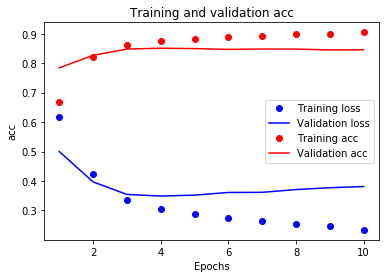

In [167]:
plot_curve(history_val)

# 3 eval

In [116]:
nn.evaluate(x_test_vec,y_test)

25000/25000 [==============================] - 4s 156us/step


[0.34594116797447205, 0.85048]